In [1]:
import os
import pathlib
import pandas as pd

In [6]:
core_path = os.getcwd()
asteroids_df = pd.read_pickle(os.path.join(core_path, "data/lvl1/", "asteroids_merged.pk1"))
asteroids_df.head()

,Name,Bus Class,DesNr,FilePath,SpectrumDF
0,1 Ceres,C,1,e:\Projects\Asteroid_Spectra_Project\data/lvl0...,Wavelength_in_micron Reflectance_norm550n...
1,2 Pallas,B,2,e:\Projects\Asteroid_Spectra_Project\data/lvl0...,Wavelength_in_micron Reflectance_norm550n...
2,3 Juno,Sk,3,e:\Projects\Asteroid_Spectra_Project\data/lvl0...,Wavelength_in_micron Reflectance_norm550n...
3,4 Vesta,V,4,e:\Projects\Asteroid_Spectra_Project\data/lvl0...,Wavelength_in_micron Reflectance_norm550n...
4,5 Astraea,S,5,e:\Projects\Asteroid_Spectra_Project\data/lvl0...,Wavelength_in_micron Reflectance_norm550n...


In [7]:
# Create a dictionary that maps the Bus CLassfication with the main group

bus_to_main_dict = {
                    'A': 'Other',
                    'B': 'C',
                    'C': 'C',
                    'Cb': 'C',
                    'Cg': 'C',
                    'Cgh': 'C',
                    'Ch': 'C',
                    'D': 'Other',
                    'K': 'Other',
                    'L': 'Other',
                    'Ld': 'Other',
                    'O': 'Other',
                    'R': 'Other',
                    'S': 'S',
                    'Sa': 'S',
                    'Sk': 'S',
                    'Sl': 'S',
                    'Sq': 'S',
                    'Sr': 'S',
                    'T': 'Other',
                    'V': 'Other',
                    'X': 'X',
                    'Xc': 'X',
                    'Xe': 'X',
                    'Xk': 'X'
                   }

In [8]:
asteroids_df.loc[:, "Main Group"] = asteroids_df["Bus Class"].apply(lambda x: bus_to_main_dict.get(x, "None"))

In [9]:
# dropping the DesNr and FilePath columns

asteroids_df.drop(columns=["DesNr", "FilePath"], inplace=True)

In [10]:
asteroids_df[-8:]

,Name,Bus Class,SpectrumDF,Main Group
1331,1995 BM2,Sq,Wavelength_in_micron Reflectance_norm550n...,S
1332,1995 WQ5,Ch,Wavelength_in_micron Reflectance_norm550n...,C
1333,1996 PW,Ld,Wavelength_in_micron Reflectance_norm550n...,Other
1334,1996 UK,Sq,Wavelength_in_micron Reflectance_norm550n...,S
1335,1996 VC,S,Wavelength_in_micron Reflectance_norm550n...,S
1336,1997 CZ5,S,Wavelength_in_micron Reflectance_norm550n...,S
1337,1997 RD1,Sq,Wavelength_in_micron Reflectance_norm550n...,S
1338,1998 WS,Sr,Wavelength_in_micron Reflectance_norm550n...,S


In [11]:
asteroids_df.loc[asteroids_df["Name"] == "1995 WQ5"]["SpectrumDF"][1332]  

,Wavelength_in_micron,Reflectance_norm550nm
0,0.44,0.9788
1,0.45,0.9817
2,0.46,0.9845
3,0.47,0.9872
4,0.48,0.9899
5,0.49,0.9925
6,0.50,0.9952
7,0.51,0.9978
8,0.52,0.9999
9,0.53,1.0011


In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Count number of asteroids per Bus taxonomy class
tax_counts = asteroids_df["Bus Class"].value_counts().sort_index()

tax_counts


Bus Class
A       16
B       60
C      141
Cb      33
Cg       9
Cgh     15
Ch     138
D        9
K       31
L       34
Ld      13
O        1
R        4
S      383
Sa      34
Sk      16
Sl      49
Sq      52
Sr      15
T       14
V       35
X      110
Xc      60
Xe      28
Xk      39
Name: count, dtype: int64

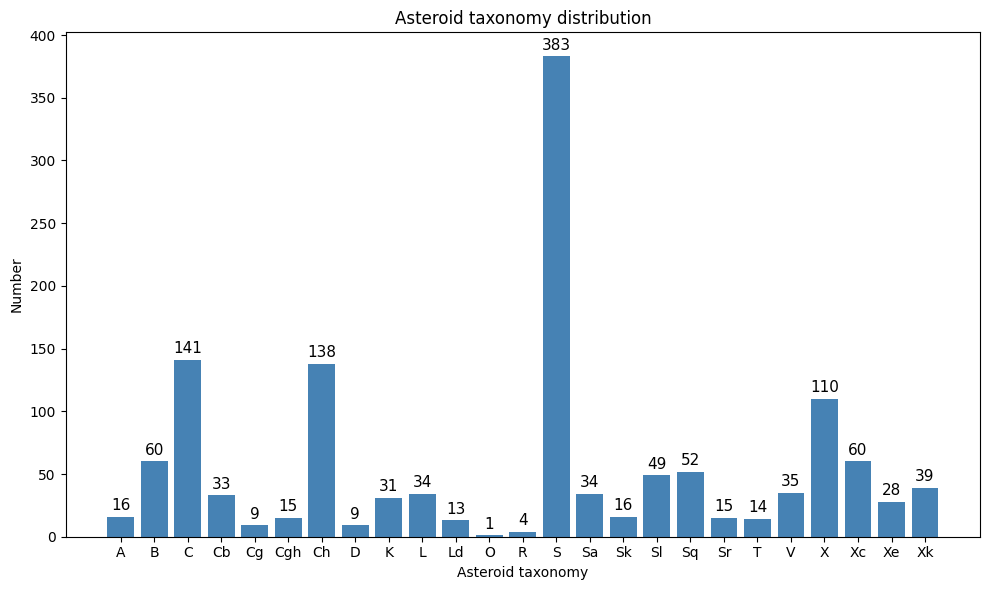

In [27]:
plt.figure(figsize=(10, 6))

bars = plt.bar(
    tax_counts.index,
    tax_counts.values,
    color="steelblue"
)

# Add numbers on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 3,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=11
    )

plt.xlabel("Asteroid taxonomy")
plt.ylabel("Number")
plt.title("Asteroid taxonomy distribution")

plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig(
    "asteroid_taxonomy_distribution.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


In [ ]:
# pathlib.Path(os.path.join(core_path, "data/lvl2")).mkdir(parents=True, exist_ok=True)
# asteroids_df.to_pickle(os.path.join(core_path, "data/lvl2/", "asteroids.pkl"), protocol=4)